In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
fund1 = pd.read_csv('Fund1.csv', parse_dates=[[0,1]], index_col='Month_Year', thousands=',').abs()
fund1.head()

,Sales,Redemption,Net,Income Distributed,Fund Size,Dividend,FBMKLCI
Month_Year,,,,,,,
1992-01-01,3.755638e+08,5.403470e+08,1.647832e+08,1.035420e+09,1.031930e+10,12.5,570.64
1992-02-01,4.194861e+08,3.846571e+08,3.482893e+07,NaN,1.035413e+10,NaN,605.06
1992-03-01,3.804028e+08,5.538938e+08,1.734910e+08,NaN,1.018064e+10,NaN,593.21
1992-04-01,3.179610e+08,2.151399e+08,1.028211e+08,NaN,1.028346e+10,NaN,591.63
1992-05-01,4.158162e+08,2.657969e+08,1.500193e+08,NaN,1.043348e+10,NaN,589.09


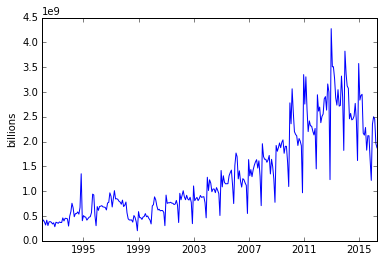

In [10]:
purchase = fund1.Sales
plt.plot(purchase)
plt.ylabel('billions')
plt.show()

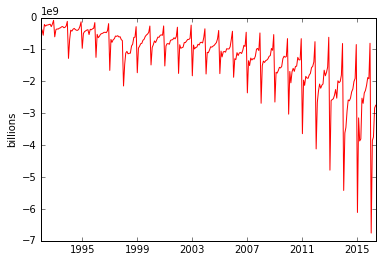

In [12]:
plt.plot(-fund1.Redemption, c='red')
plt.ylabel('billions')
plt.show()

In [5]:
#sales growth
# (fund1.Sales/fund1.Sales.shift(1)-1).plot()

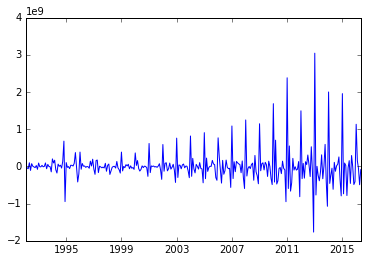

In [6]:
#monthly sales difference
fund1['Sales First Difference'] = fund1.Sales-fund1.Sales.shift(1)
plt.plot(fund1['Sales First Difference'])

In [7]:
#import numpy as np
#fund1['Sales Natural Log'] = fund1.Sales.apply(lambda x: np.log(x))
#plt.plot(fund1['Sales Natural Log'])

In [8]:
#fund1['Logged Sales First Difference'] = fund1['Sales Natural Log'] - fund1['Sales Natural Log'].shift(1)
#plt.plot(fund1['Logged Sales First Difference'])

In [9]:
#redemption growth
#(fund1.Redemption/fund1.Redemption.shift(1)-1).plot()

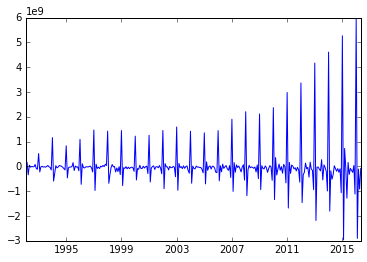

In [10]:
#monthly redemptions difference
fund1['Redemptions First Difference'] = fund1.Redemption-fund1.Redemption.shift(1)
plt.plot(fund1['Redemptions First Difference'])

In [11]:
import statsmodels.api as stats

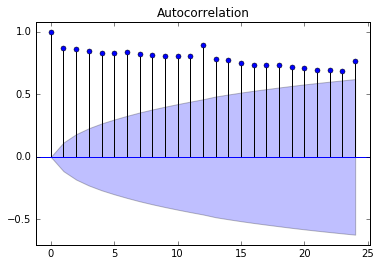

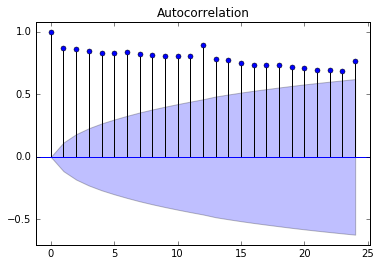

In [12]:
stats.graphics.tsa.plot_acf(fund1.Sales, lags=24)

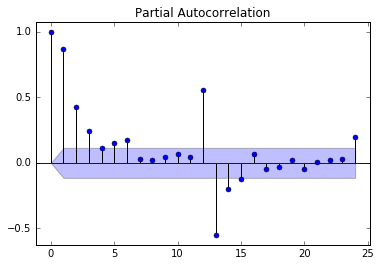

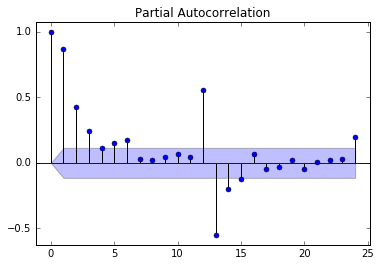

In [13]:
stats.graphics.tsa.plot_pacf(fund1.Sales, lags=24)

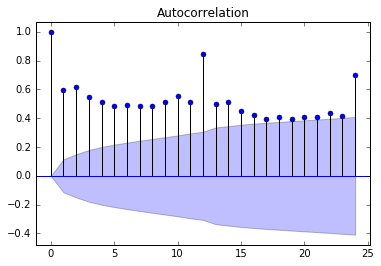

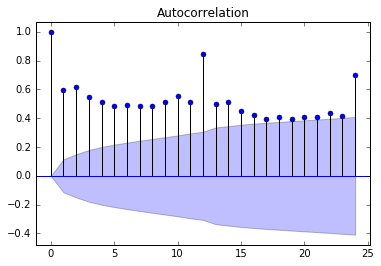

In [14]:
stats.graphics.tsa.plot_acf(fund1.Redemption, lags=24)

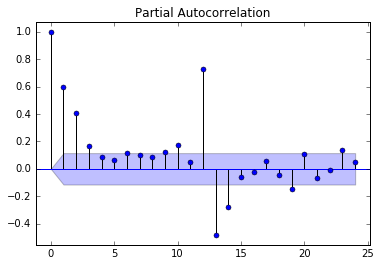

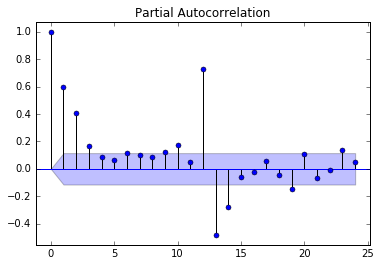

In [15]:
stats.graphics.tsa.plot_pacf(fund1.Redemption, lags=24)

In [16]:
import sys
sys.path.append('c:/Users/mohds/SYD_DAT_5/labs/Week 8')

In [17]:
import holtwinters as holt

In [41]:
sales_predict = holt.multiplicative(list(fund1.Sales)[:-29], 12, 84)
sales_predict

([4550883241.5410261,
  3848392396.5127792,
  4120168133.1289439,
  3671382670.9587584,
  3433030460.4054174,
  3428649504.2755394,
  3536644962.1264505,
  3317984323.6002903,
  3342218623.0486302,
  3549893078.2844815,
  3205085248.3820829,
  1853596477.6919274,
  4891642854.834897,
  4134764214.8671885,
  4424874181.0849361,
  3941235820.4060569,
  3683828126.0487723,
  3677611476.8078761,
  3791904149.6259627,
  3556029811.1875844,
  3580577706.7339296,
  3801567276.4497676,
  3430979268.5364628,
  1983474914.9161167,
  5232402468.1287689,
  4421136033.2215977,
  4729580229.0409279,
  4211088969.8533559,
  3934625791.6921272,
  3926573449.3402123,
  4047163337.1254745,
  3794075298.774879,
  3818936790.419229,
  4053241474.6150537,
  3656873288.6908426,
  2113353352.1403058,
  5573162081.4226398,
  4707507851.5760059,
  5034286276.9969196,
  4480942119.3006544,
  4185423457.3354816,
  4175535421.8725491,
  4302422524.6249866,
  4032120786.3621736,
  4057295874.1045284,
  4304915672.

In [42]:
(sdata, slevel_decay, strend_decay, sseasonal_decay, sroot_mse) = sales_predict

In [43]:
pd.date_range('2014-01-01', periods=84, freq='M')

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
      

In [44]:
predicted_sales = pd.Series(data=sdata, index = pd.date_range('2014-01-01', periods=84, freq='M'))

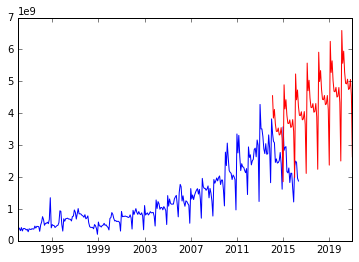

In [45]:
plt.plot(fund1.Sales)
plt.plot(predicted_sales, c='red')

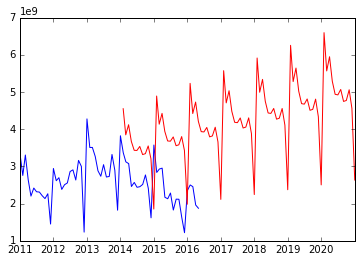

In [52]:
plt.plot(fund1.Sales.ix[228:])
plt.plot(predicted_sales, c='red')

In [46]:
redemptions_predict = holt.multiplicative(list(fund1.Redemption)[:-29], 12, 84)
redemptions_predict

([4996402833.4988852,
  2782645547.0669947,
  2708687532.8245716,
  2641823947.2629313,
  2565104743.3364058,
  2390234027.0404043,
  2622838194.2483377,
  2069152619.1081948,
  2142345905.7115939,
  2091218693.5194485,
  1884880873.4795685,
  840095864.46138358,
  5299059245.1120043,
  2950357323.6424823,
  2871125958.5095606,
  2799464799.8025069,
  2717410312.6359148,
  2531457704.4773412,
  2777045706.2671065,
  2190213525.4368649,
  2267081005.4553261,
  2212389068.0454879,
  1993570712.1095636,
  888307509.50166309,
  5601715656.7251577,
  3118069100.2179875,
  3033564384.1945672,
  2957105652.3420997,
  2869715881.9354401,
  2672681381.9142942,
  2931253218.2858915,
  2311274431.7655482,
  2391816105.1990719,
  2333559442.5715404,
  2102260550.7395709,
  936519154.5419476,
  5904372068.3383436,
  3285780876.7935119,
  3196002809.8795915,
  3114746504.8817096,
  3022021451.2349815,
  2813905059.351263,
  3085460730.3046947,
  2432335338.0942454,
  2516551204.9428329,
  2454729817

In [47]:
(rdata, rlevel_decay, rtrend_decay, rseasonal_decay, rroot_mse) = redemptions_predict

In [48]:
predicted_redemptions = pd.Series(data=rdata, index = pd.date_range('2014-01-01', periods=84, freq='M'))

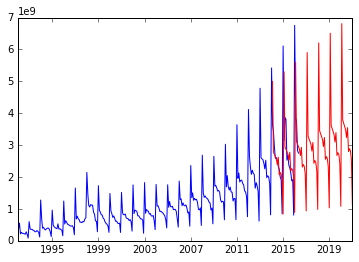

In [49]:
plt.plot(fund1.Redemption)
plt.plot(predicted_redemptions, c='red')

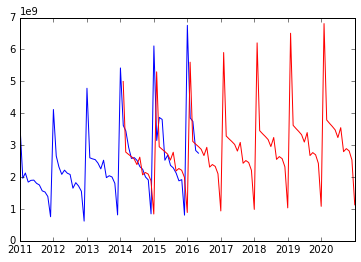

In [53]:
plt.plot(fund1.Redemption.ix[228:])
plt.plot(predicted_redemptions, c='red')

In [30]:
fund1.Sales.ix[168:]

Month_Year
2006-01-01    1.518953e+09
2006-02-01    1.769416e+09
2006-03-01    1.697669e+09
2006-04-01    1.248800e+09
2006-05-01    1.410455e+09
2006-06-01    1.199757e+09
2006-07-01    1.083022e+09
2006-08-01    1.253220e+09
2006-09-01    1.228565e+09
2006-10-01    1.166535e+09
2006-11-01    1.115494e+09
2006-12-01    5.506919e+08
2007-01-01    1.637280e+09
2007-02-01    1.310594e+09
2007-03-01    1.435845e+09
2007-04-01    1.293249e+09
2007-05-01    1.427352e+09
2007-06-01    1.521690e+09
2007-07-01    1.588741e+09
2007-08-01    1.636000e+09
2007-09-01    1.465891e+09
2007-10-01    1.612106e+09
2007-11-01    1.303374e+09
2007-12-01    7.088364e+08
2008-01-01    1.957439e+09
2008-02-01    1.698756e+09
2008-03-01    1.644183e+09
2008-04-01    1.643496e+09
2008-05-01    1.583100e+09
2008-06-01    1.632022e+09
                  ...     
2013-12-01    1.822572e+09
2014-01-01    3.823408e+09
2014-02-01    3.365854e+09
2014-03-01    3.122801e+09
2014-04-01    3.074615e+09
2014-05-01    2.4

In [28]:
# data from 2006 onwards
fund1_v2 = fund1.ix[168:]
fund1_v2.head()

,Sales,Redemption,Net,Income Distributed,Fund Size,Dividend,FBMKLCI,Sales First Difference,Redemptions First Difference
Month_Year,,,,,,,,,
2006-01-01,1.518953e+09,1.871480e+09,3.525276e+08,3.487976e+09,4.726876e+10,9.0,914.01,7.679592e+08,1.443562e+09
2006-02-01,1.769416e+09,1.289661e+09,4.797557e+08,NaN,4.774852e+10,NaN,928.94,2.504638e+08,-5.818195e+08
2006-03-01,1.697669e+09,1.316284e+09,3.813849e+08,NaN,4.812991e+10,NaN,926.63,-7.174708e+07,2.662370e+07
2006-04-01,1.248800e+09,1.099972e+09,1.488276e+08,NaN,4.827873e+10,NaN,949.23,-4.488695e+08,-2.163121e+08
2006-05-01,1.410455e+09,1.189801e+09,2.206543e+08,NaN,4.849939e+10,NaN,927.78,1.616551e+08,8.982842e+07


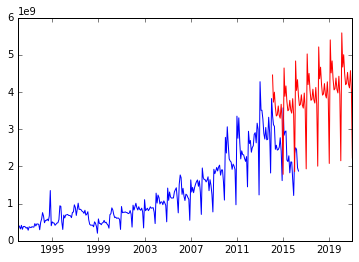

In [50]:
sales_predict_v2 = holt.multiplicative(list(fund1.Sales.ix[168:])[:-29], 12, 84)
(s2data, s2level_decay, s2trend_decay, s2seasonal_decay, s2root_mse) = sales_predict_v2
predicted_sales_v2 = pd.Series(data=s2data, index = pd.date_range('2014-01-01', periods=84, freq='M'))
plt.plot(fund1.Sales)
plt.plot(predicted_sales_v2, c='red')

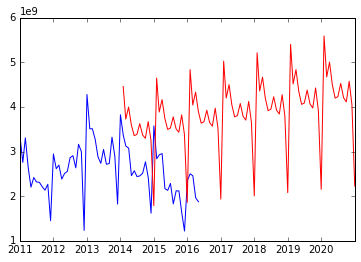

In [54]:
plt.plot(fund1.Sales.ix[228:])
plt.plot(predicted_sales_v2, c='red')

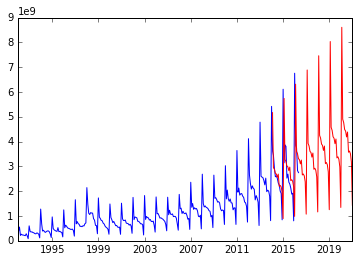

In [51]:
redemptions_predict_v2 = holt.multiplicative(list(fund1.Redemption.ix[168:])[:-29], 12, 84)
(r2data, r2level_decay, r2trend_decay, r2seasonal_decay, r2root_mse) = redemptions_predict_v2
predicted_redemptions_v2 = pd.Series(data=r2data, index = pd.date_range('2014-01-01', periods=84, freq='M'))
plt.plot(fund1.Redemption)
plt.plot(predicted_redemptions_v2, c='red')

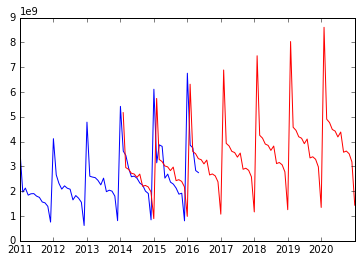

In [55]:
plt.plot(fund1.Redemption.ix[228:])
plt.plot(predicted_redemptions_v2, c='red')

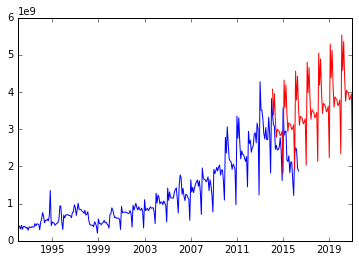

In [58]:
sales_predict_v3 = holt.multiplicative(list(fund1.Sales.ix[228:])[:-29], 12, 84)
(s3data, s3level_decay, s3trend_decay, s3seasonal_decay, s3root_mse) = sales_predict_v3
predicted_sales_v3 = pd.Series(data=s3data, index = pd.date_range('2014-01-01', periods=84, freq='M'))
plt.plot(fund1.Sales)
plt.plot(predicted_sales_v3, c='red')

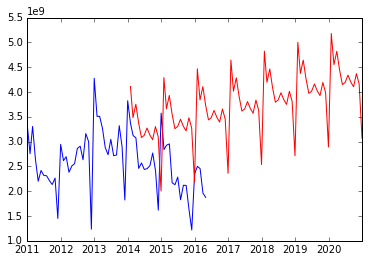

In [60]:
plt.plot(fund1.Sales.ix[228:])
plt.plot(predicted_sales_v3, c='red')

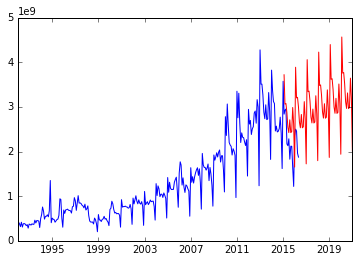

In [64]:
sales_predict_v4 = holt.multiplicative(list(fund1.Sales.ix[252:])[:-17], 12, 72)
(s4data, s4level_decay, s4trend_decay, s4seasonal_decay, s4root_mse) = sales_predict_v4
predicted_sales_v4 = pd.Series(data=s4data, index = pd.date_range('2015-01-01', periods=72, freq='M'))
plt.plot(fund1.Sales)
plt.plot(predicted_sales_v4, c='red')

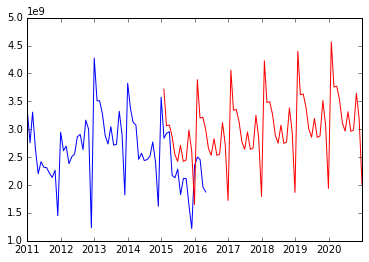

In [65]:
plt.plot(fund1.Sales.ix[228:])
plt.plot(predicted_sales_v4, c='red')

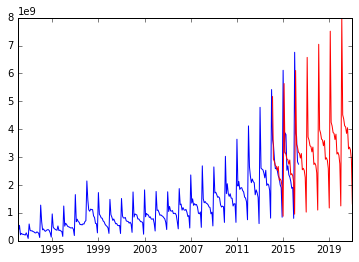

In [66]:
redemptions_predict_v3 = holt.multiplicative(list(fund1.Redemption.ix[228:])[:-29], 12, 84)
(r3data, r3level_decay, r3trend_decay, r3seasonal_decay, r3root_mse) = redemptions_predict_v3
predicted_redemptions_v3 = pd.Series(data=r3data, index = pd.date_range('2014-01-01', periods=84, freq='M'))
plt.plot(fund1.Redemption)
plt.plot(predicted_redemptions_v3, c='red')

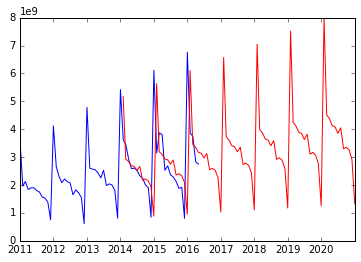

In [67]:
plt.plot(fund1.Redemption.ix[228:])
plt.plot(predicted_redemptions_v3, c='red')

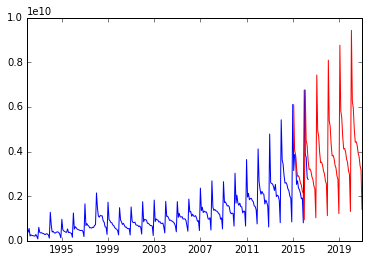

In [69]:
redemptions_predict_v4 = holt.multiplicative(list(fund1.Redemption.ix[252:])[:-17], 12, 72)
(r4data, r4level_decay, r4trend_decay, r4seasonal_decay, r4root_mse) = redemptions_predict_v4
predicted_redemptions_v4 = pd.Series(data=r4data, index = pd.date_range('2015-01-01', periods=72, freq='M'))
plt.plot(fund1.Redemption)
plt.plot(predicted_redemptions_v4, c='red')

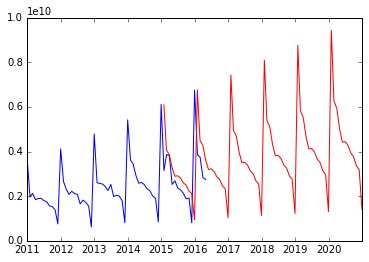

In [70]:
plt.plot(fund1.Redemption.ix[228:])
plt.plot(predicted_redemptions_v4, c='red')

In [88]:
import sklearn.metrics as metrics
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales.ix[:29])
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Sales.ix[264:], predicted_sales.ix[:29])

2.0544834841e+18
1433346951.75
-5.04353165743


In [89]:
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales_v2.ix[:29])
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales_v2.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Sales.ix[264:], predicted_sales_v2.ix[:29])

1.64236846416e+18
1281549243.75
-3.83124146926


In [90]:
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales_v3.ix[:29])
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales_v3.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Sales.ix[264:], predicted_sales_v3.ix[:29])

1.15910223671e+18
1076616104.61
-2.40965070587


In [91]:
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales_v4.ix[:29])
print metrics.mean_squared_error(fund1.Sales.ix[264:], predicted_sales_v4.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Sales.ix[264:], predicted_sales_v4.ix[:29])

3.82702440407e+17
618629485.562
-0.125769241696


In [92]:
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions.ix[:29])
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Redemption.ix[264:], predicted_redemptions.ix[:29])

2.4653989953e+17
496527843.661
0.858886332238


In [93]:
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions_v2.ix[:29])
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions_v2.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Redemption.ix[264:], predicted_redemptions_v2.ix[:29])

1.41381892152e+17
376007835.227
0.919076314241


In [94]:
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions_v3.ix[:29])
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions_v3.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Redemption.ix[264:], predicted_redemptions_v3.ix[:29])

1.52311273329e+17
390270769.248
0.912820592278


In [95]:
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions_v4.ix[:29])
print metrics.mean_squared_error(fund1.Redemption.ix[264:], predicted_redemptions_v4.ix[:29])**(1/2.0)
print metrics.r2_score(fund1.Redemption.ix[264:], predicted_redemptions_v4.ix[:29])

3.74565299336e+17
612017401.171
0.785607590065


In [99]:
result = pd.DataFrame({'Sales':predicted_sales_v4, 'Redemptions':predicted_redemptions_v2})

In [100]:
result.to_csv('result.csv')